In [1]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 42.5 s


In [2]:
df = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_only\\BES2019_W23_v23.0.dta" )

In [3]:
search(df,"vote")

generalElectionVote        30400
localElectionVote          10145
euRefVote                  30427
motherVote2                 2245
fatherVote2                 2245
p_past_vote_2010           19988
p_past_vote_2005           18482
p_past_vote_2015           25230
p_past_vote_2017           25580
p_past_vote_2019           26608
p_scot_const_vote_2011      2095
p_scot_list_vote_2011       2094
p_scot_const_vote_2016     12180
p_scot_list_vote_2016      12178
p_welsh_const_vote_2016     2238
p_welsh_list_vote_2016      2238
p_eurefvote                26616
p_vote_scot_ref             3088
dtype: int64

In [6]:
search(df,"generalElection")

generalElectionVote    30400
dtype: int64

In [8]:
df["generalElectionVote"].value_counts()

Labour                           8472
Conservative                     7742
Don't know                       5684
Liberal Democrat                 2598
I would/did not vote             1783
Green Party                      1513
Scottish National Party (SNP)    1043
Brexit Party/Reform UK            858
Other                             521
Plaid Cymru                       186
Name: generalElectionVote, dtype: int64

In [9]:
df["p_past_vote_2019"].value_counts()

Conservative                                11552
Labour                                       8040
Liberal Democrat                             3363
Scottish National Party (SNP)                1163
Green Party                                   815
Brexit Party/Reform UK                        603
Don't know                                    380
Other                                         350
Plaid Cymru                                   185
An independent candidate                      138
United Kingdom Independence Party (UKIP)       19
Name: p_past_vote_2019, dtype: int64

In [40]:
import pandas as pd
itr = pd.read_stata("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_only\\BES2019_W23_v23.0.dta", iterator=True)
labels = itr.variable_labels()

In [41]:
labels

{'id': 'ID',
 'starttime': 'Interview Start Time',
 'endtime': 'Interview End Time',
 'wt': '',
 'turnoutUKGeneral': 'Likelihood to vote in general election',
 'generalElectionVote': 'General election vote intention (recalled vote in post-election waves)',
 'partyIdStrength': 'Strength of party identification',
 'partyId': 'Party identification',
 'partyIdSqueeze': 'Party ID if no party to first ID question',
 'anyUniW21W22': 'Have you ever attended a University or other higher education institution?',
 'ukCitizen': 'Respondent is a UK citizen',
 'irishCitizen': 'Respondent is an Irish citizen',
 'maltacyprusCitizen': 'Respondent is a citizen of Malta or Cyprus',
 'euCitizen': 'Respondent is an EU citizen',
 'commonwealthCitizen': 'Respondent is a commonwealth citizen',
 'otherCitizen': 'Respondent is a citizen of another country',
 'leavetoremain': 'Respondent has leave to enter or remain in the UK',
 'mii': 'Most Important Issue',
 'bestOnMII': 'Best party on most important issue',
 

In [21]:
Conservative.dtypes.apply(lambda x: x.name).value_counts()

category          444
float64            10
datetime64[ns]      2
int32               1
dtype: int64

In [22]:
Conservative = df[df["p_past_vote_2019"]=="Conservative"]
Conservative = pd.get_dummies( Conservative.select_dtypes('category') )
Conservative = Conservative.drop(Conservative.columns[Conservative.var()==0],axis=1)

In [23]:
Conservative

turnoutUKGeneral_Very unlikely that I would vote  \
0                                                     0   
3                                                     0   
4                                                     0   
5                                                     0   
11                                                    0   
...                                                 ...   
30884                                                 0   
30919                                                 0   
30930                                                 0   
30932                                                 0   
30942                                                 0   

       turnoutUKGeneral_Fairly unlikely  \
0                                     0   
3                                     0   
4                                     0   
5                                     0   
11                                    0   
...                                 ...   
30884                                 0   
30919                                 0   
30930                                 0   
30932                                 0   
30942                                 0   

       turnoutUKGeneral_Neither likely nor unlikely  \
0                                                 0   
3                                                 0   
4                                                 0   
5                                                 0   
11                                                0   
...                                             ...   
30884                                             1   
30919                                             0   
30930                                             0   
30932                                             0   
30942                                             0   

       turnoutUKGeneral_Fairly likely  \
0                                   1   
3                                   0   
4                                   0   
5                                   0   
11                                  0   
...                               ...   
30884                               0   
30919                               0   
30930                               0   
30932                               0   
30942                               0   

       turnoutUKGeneral_Very likely that I would vote  \
0                                                   0   
3                                                   1   
4                                                   1   
5                                                   1   
11                                                  1   
...                                               ...   
30884                                               0   
30919                                               1   
30930                                               1   
30932                                               1   
30942                                               1   

       turnoutUKGeneral_Don't know  generalElectionVote_I would/did not vote  \
0                                0                                         0   
3                                0                                         0   
4                                0                                         0   
5                                0                                         0   
11                               0                                         0   
...                            ...                                       ...   
30884                            0                                         0   
30919                            0                                         0   
30930                            0                                         0   
30932                            0                                         0   
30942                            0                            

In [89]:
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def dim_red(df,n_components=None,red_type="Factor Analysis",show_first_x_comps=4,display_comp=True,LDA_target=None):

    Treatment = "Census Data Decomposition"
    output_folder = "E:\\BES_analysis_data\\output\\CensusDataDecomposition\\"
    output_subfolder = output_folder + Treatment + os.sep
    if not os.path.exists( output_subfolder ):
        os.makedirs( output_subfolder )

    decomp_index = df.index
    decomp_columns = df.columns
    clean_feature_set_std = StandardScaler().fit_transform(df.values)
    decomp_std = pd.DataFrame(   clean_feature_set_std,
                                 columns = decomp_columns,
                                 index   = decomp_index      )
    if n_components is None:
        n_components = decomp_std.shape[1]
    
    # n_components = 4
    # (svd_solver='full', n_components='mle',whiten=True)
    
    if red_type == "Factor Analysis":
        decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hr
    elif red_type == "PCA":
        decomp = PCA(n_components = n_components,svd_solver='full')
    elif red_type == "LDA":
        decomp = LinearDiscriminantAnalysis(n_components = n_components,solver='svd')
        
    decomp_method = str(decomp).split("(")[0] 
    
    if red_type in ["Factor Analysis","PCA"]:
        X_r = decomp.fit_transform(decomp_std)
    elif red_type in ["LDA"]:
        X_r = decomp.fit_transform(decomp_std,LDA_target)
    
    n_components = min(n_components,X_r.shape[1])
    BES_decomp = pd.DataFrame(   X_r,
                                 columns = range(0,n_components),
                                 index   = decomp_index)

#     save = True # False => Load
#     if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
#         decomp_method = str(decomp).split("(")[0] 
#         subdir = output_subfolder + decomp_method
#         fname = subdir+ os.sep + decomp_method
    subdir = output_subfolder + decomp_method
    if display_comp:
        (BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                              decomp_columns, BES_decomp, manifest=None, 
                                                              save_folder = subdir,  
                                                              show_first_x_comps= show_first_x_comps, show_histogram = False)    
        return (BES_decomp, comp_labels, comp_dict, decomp)
    else:
        return BES_decomp

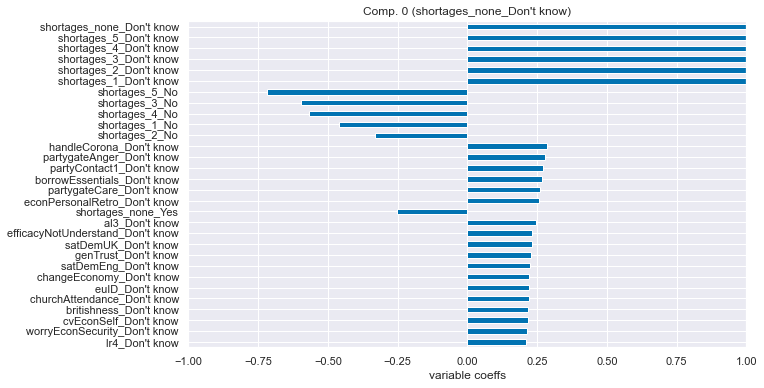

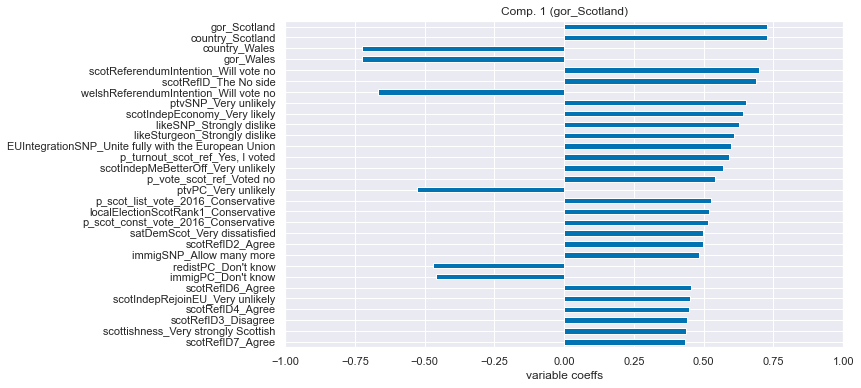

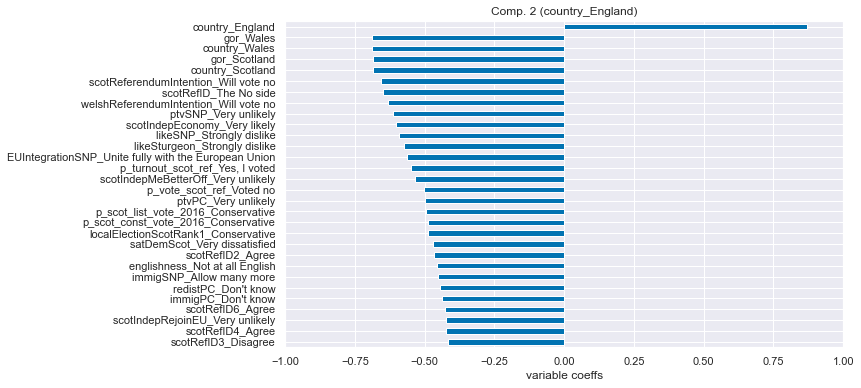

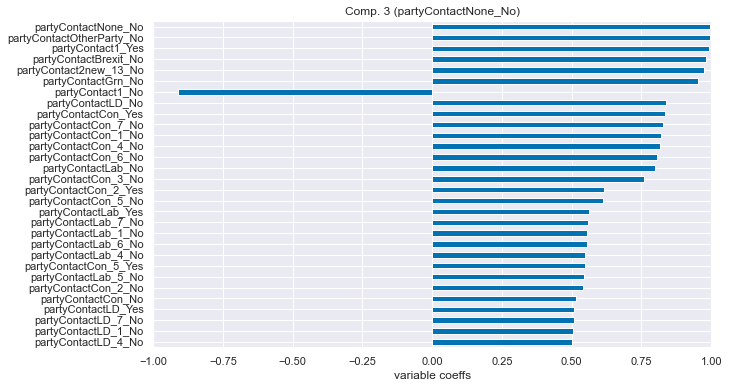

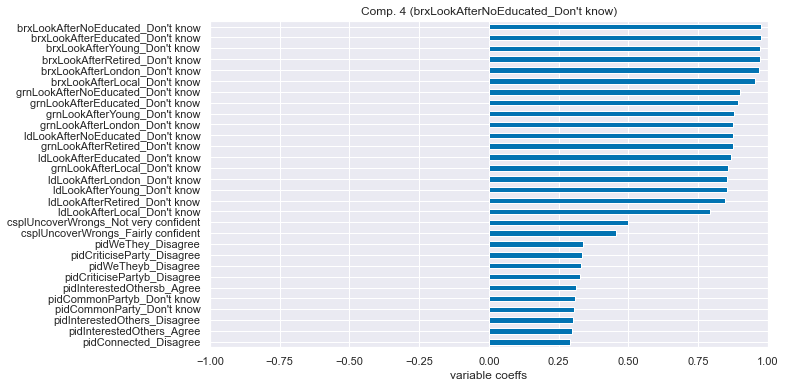

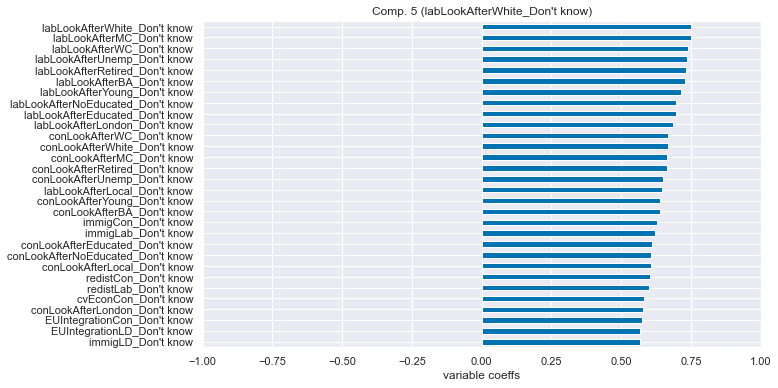

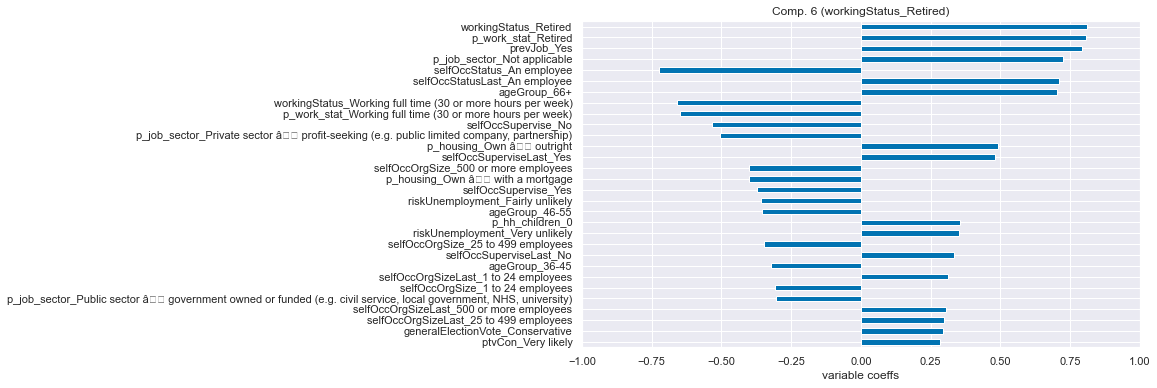

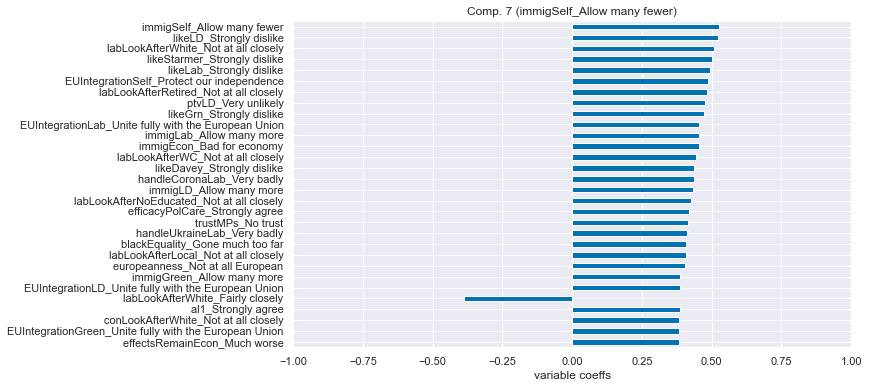

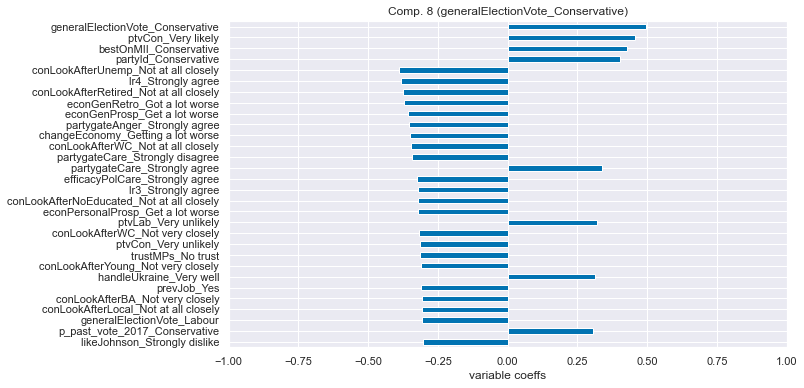

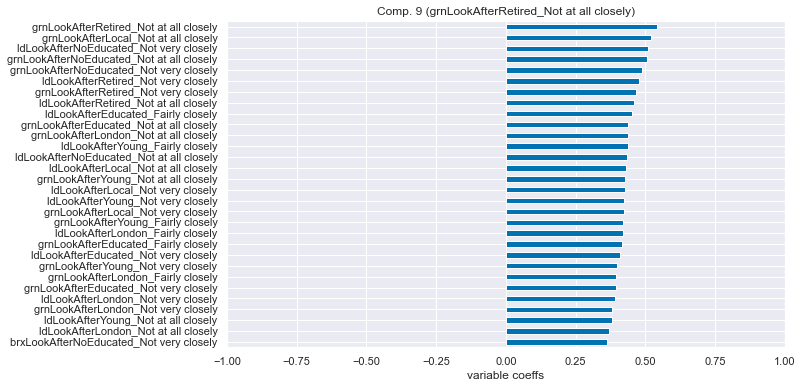

In [38]:

n_compFA = 10
n_comp = 10

(BES_decomp, comp_labels, comp_dict) = dim_red(Conservative, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [ ]:
# Drop Don't know
# Drop Geo specific stuff (maybe drop Scotland and Wales?)
# Drop PartyContact

In [ ]:
# Conservative = df[df["p_past_vote_2019"]=="Conservative"]
# Conservative = pd.get_dummies( Conservative.select_dtypes('category') )
# Conservative = Conservative.drop(Conservative.columns[Conservative.var()==0],axis=1)

Index(['turnoutUKGeneral_Don't know', 'generalElectionVote_Don't know',
       'partyIdStrength_Don't know', 'partyId_Don't know',
       'partyIdSqueeze_Don't know', 'anyUniW21W22_Don't know',
       'mii_Don't know', 'bestOnMII_Don't know', 'polAttention_Don't know',
       'pidWeThey_Don't know',
       ...
       'p_past_vote_2010_Don't know', 'p_past_vote_2005_Don't know',
       'p_past_vote_2015_Don't know', 'p_past_vote_2017_Don't know',
       'p_turnout_2015_Don't know', 'p_turnout_2017_Don't know',
       'p_eurefvote_Don't know', 'p_vote_scot_ref_Don't know',
       'p_turnout_scot_ref_Don't know', 'p_eurefturnout_Don't know'],
      dtype='object', length=479)

In [57]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(Conservative,"Don't know|partyContact").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.02],axis=1)

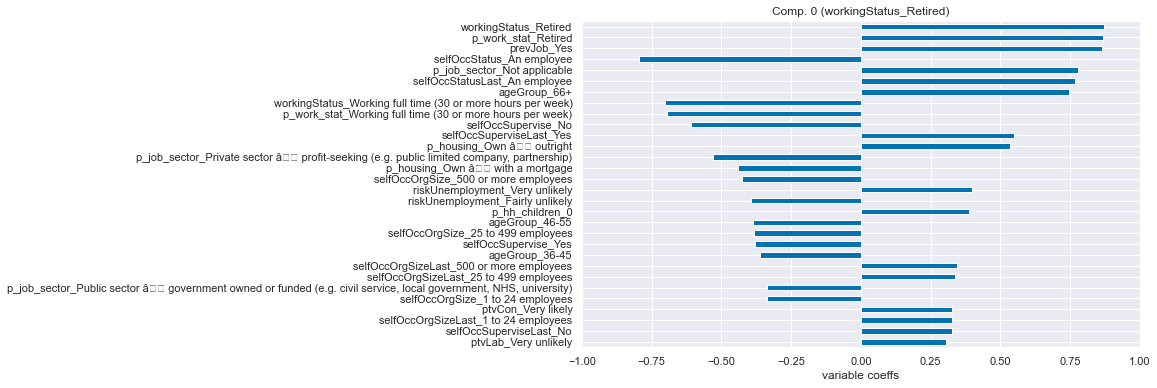

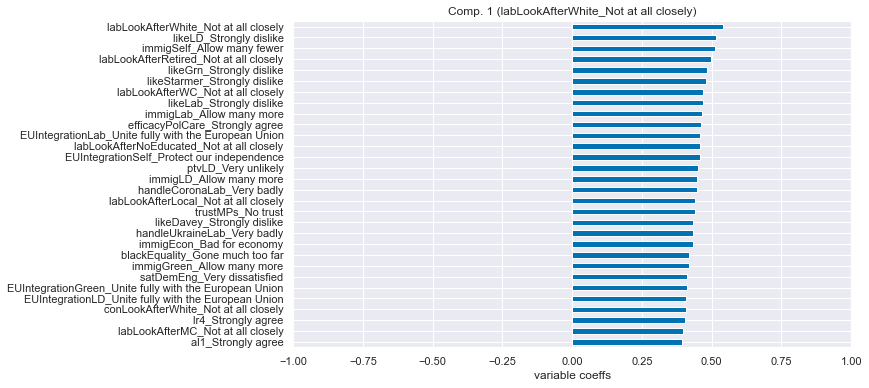

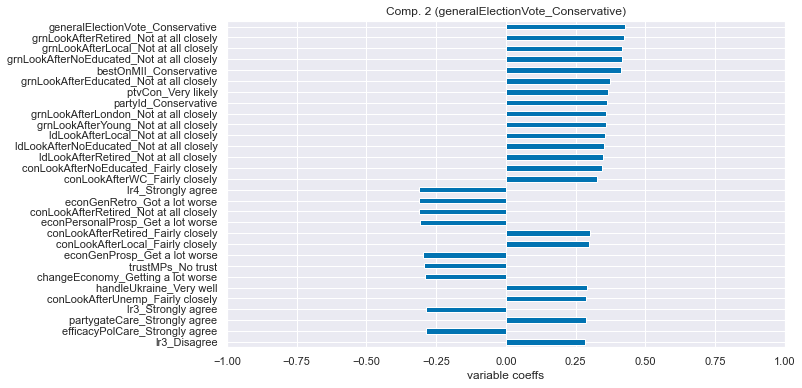

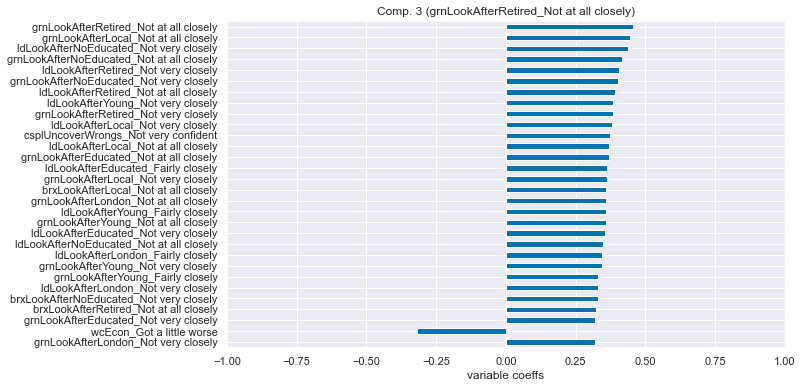

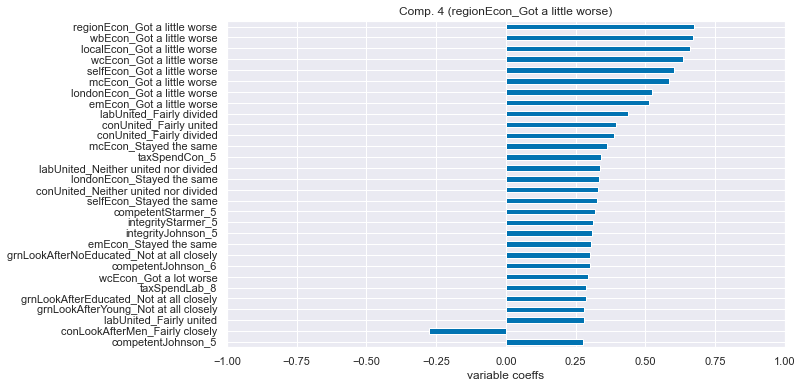

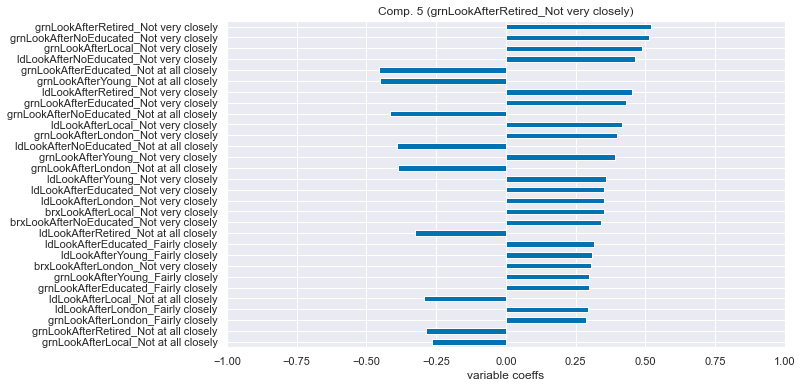

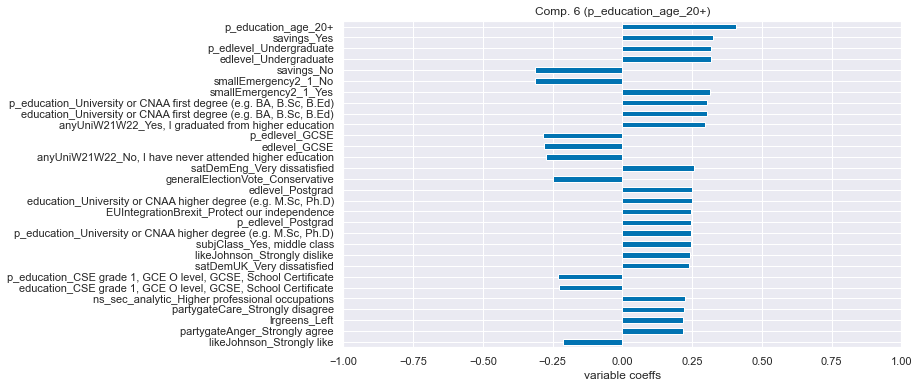

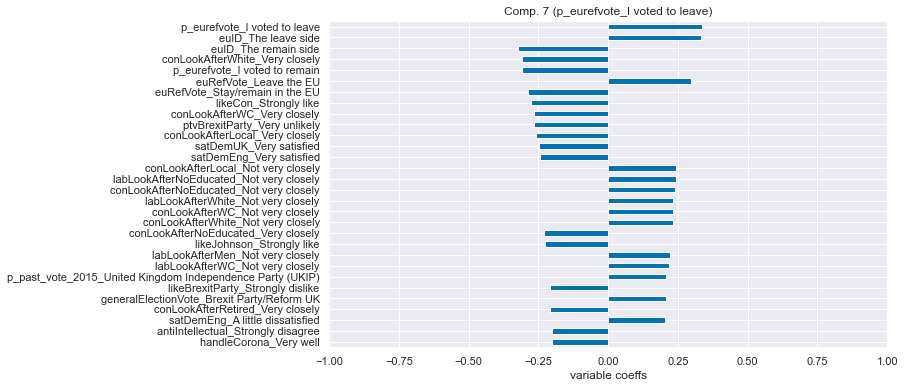

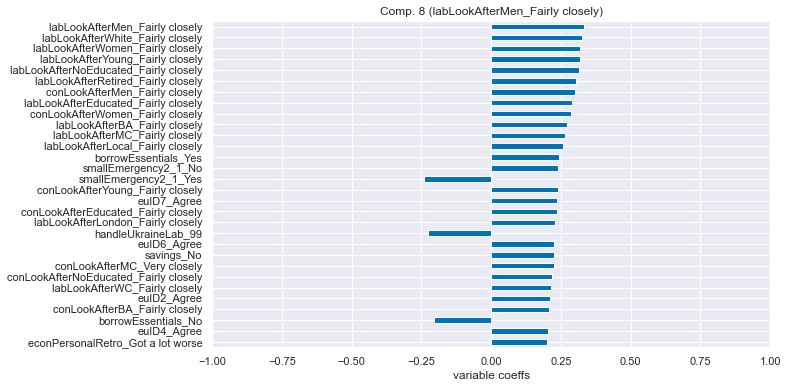

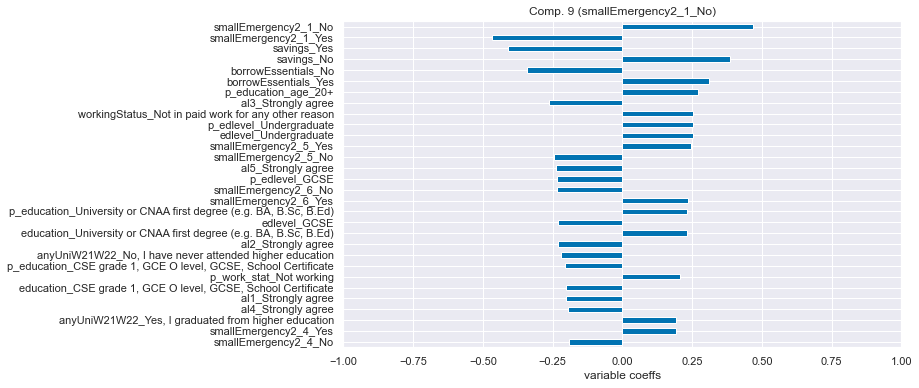

In [59]:
n_compFA = 10
n_comp = 10

(BES_decomp, comp_labels, comp_dict) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [60]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(Conservative,"Don't know|partyContact|LookAfter").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.02],axis=1)

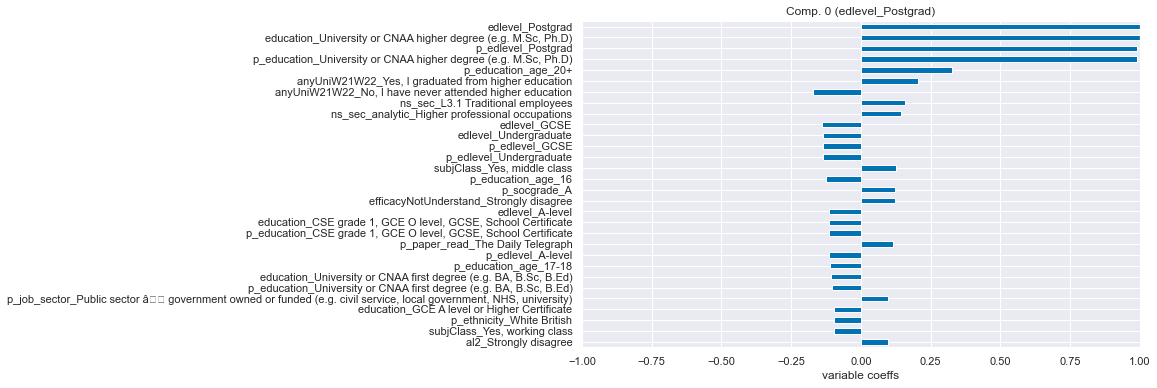

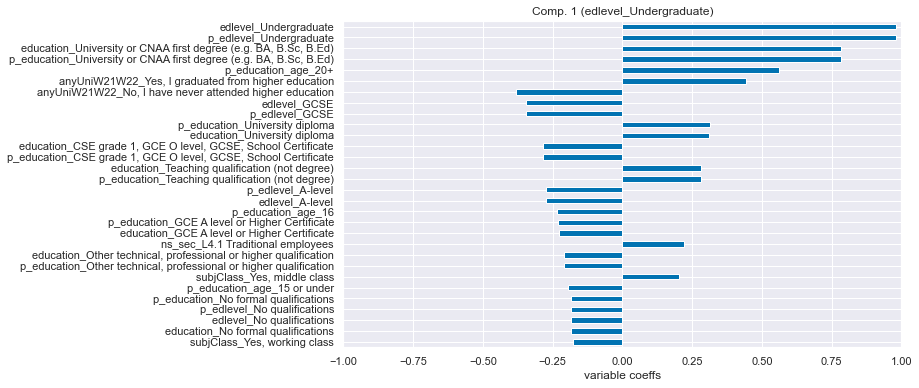

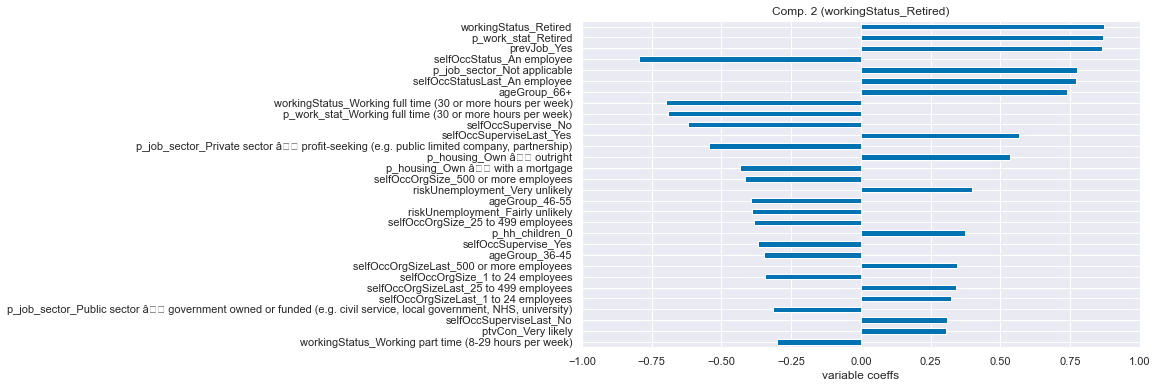

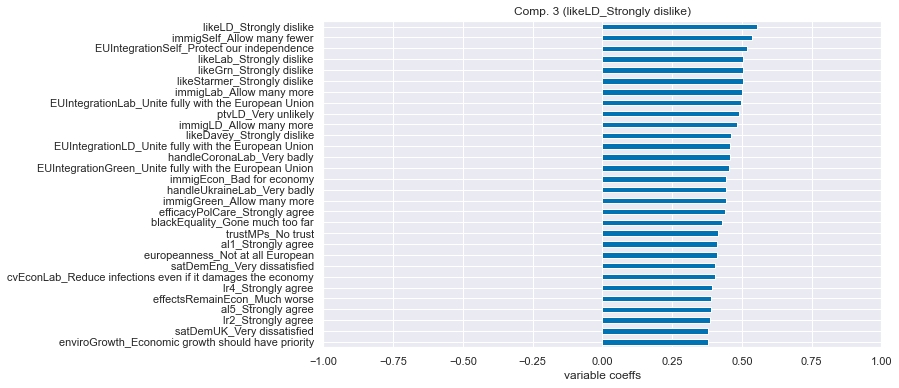

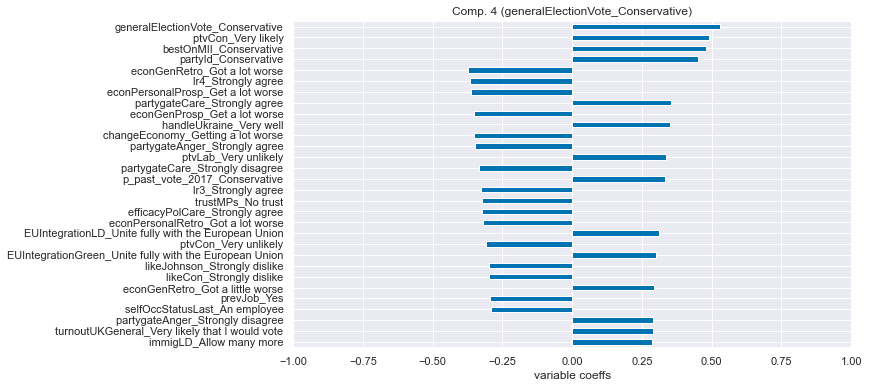

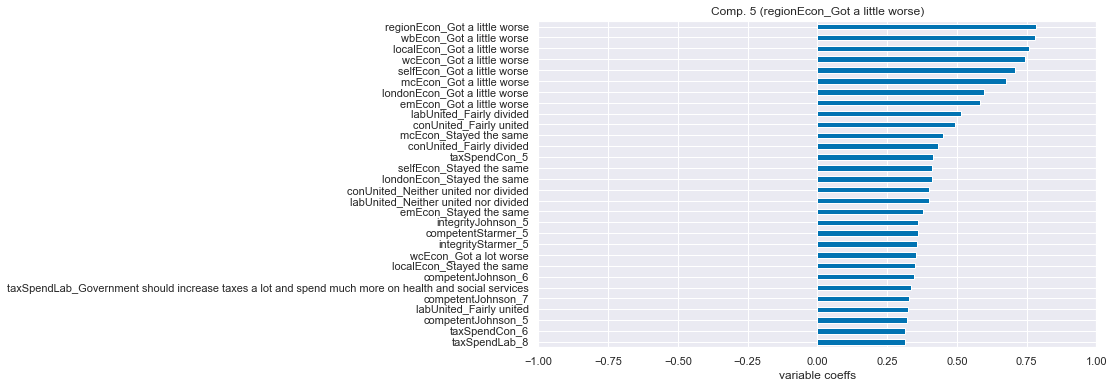

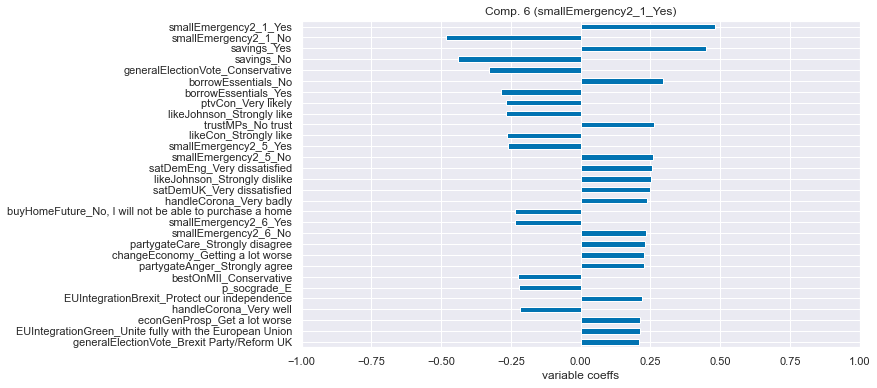

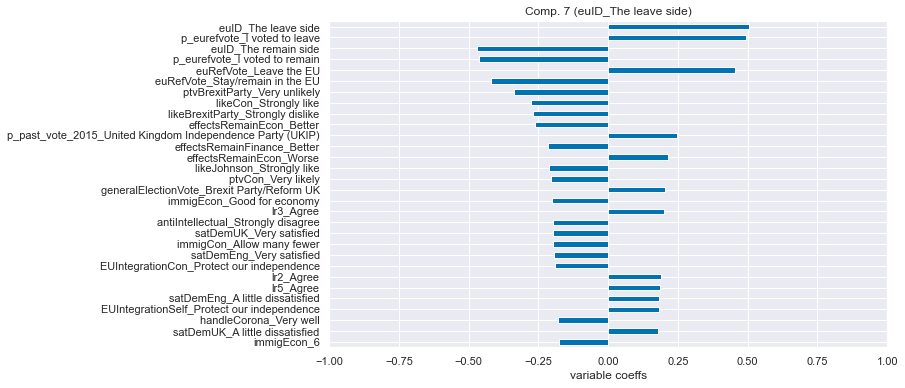

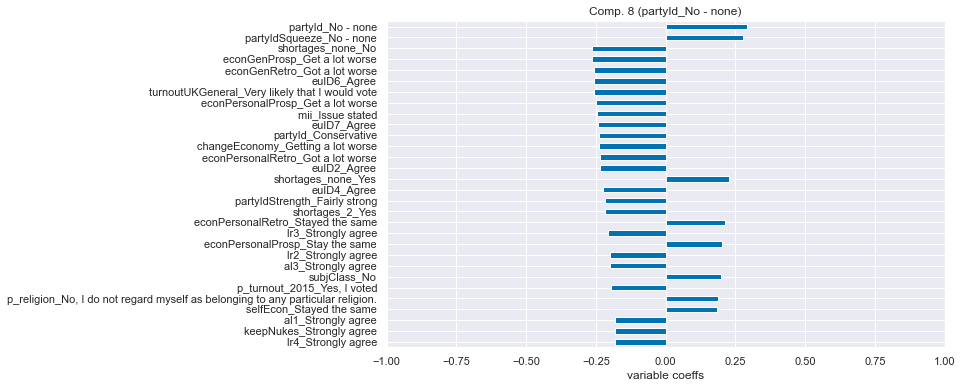

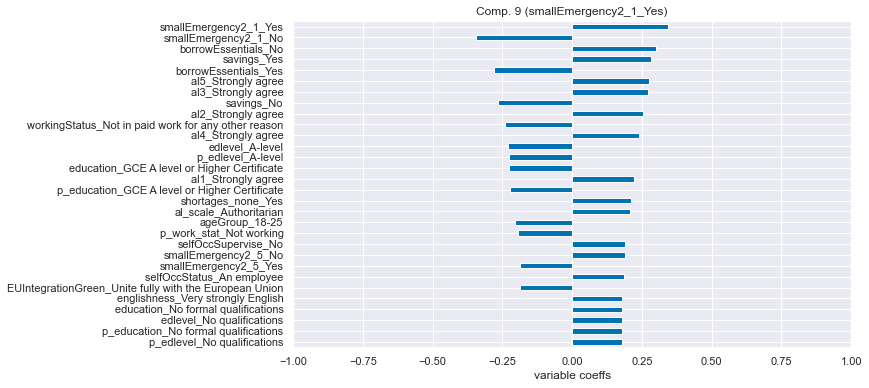

In [61]:
n_compFA = 10
n_comp = 10

(BES_decomp, comp_labels, comp_dict) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

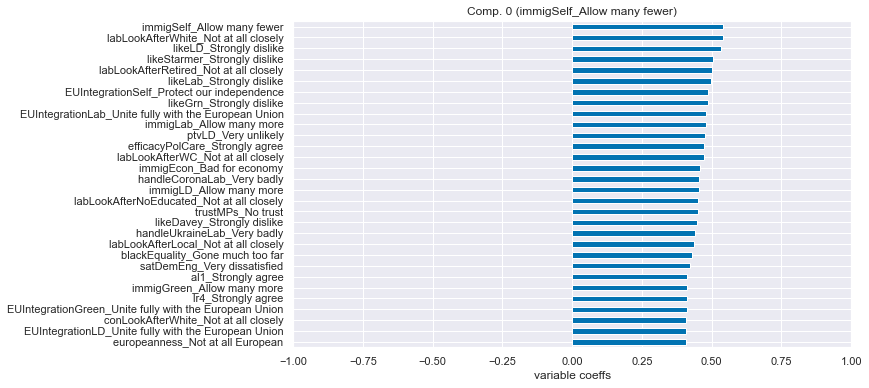

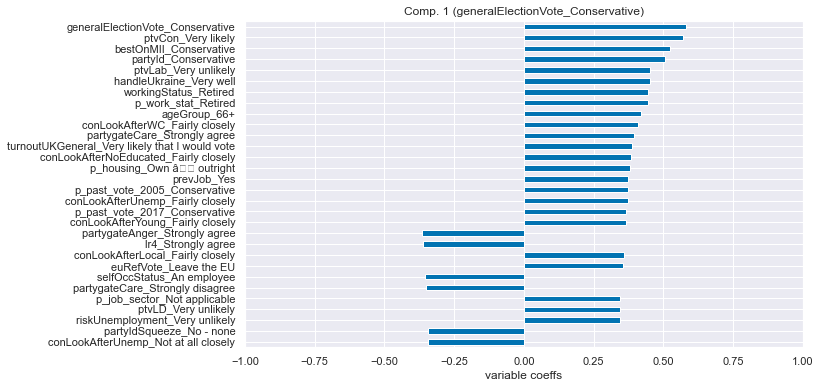

In [62]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(Conservative,"Don't know|partyContact").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.02],axis=1)

n_compFA = 2
n_comp = 2

(BES_decomp, comp_labels, comp_dict) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

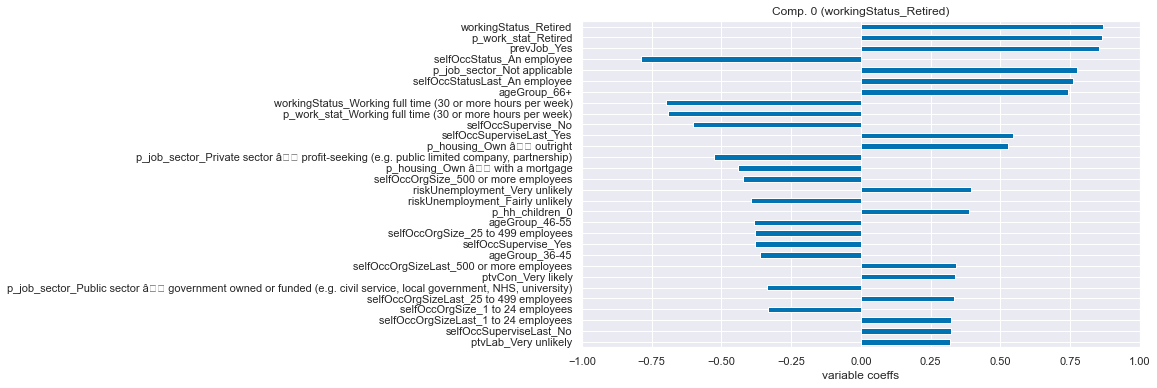

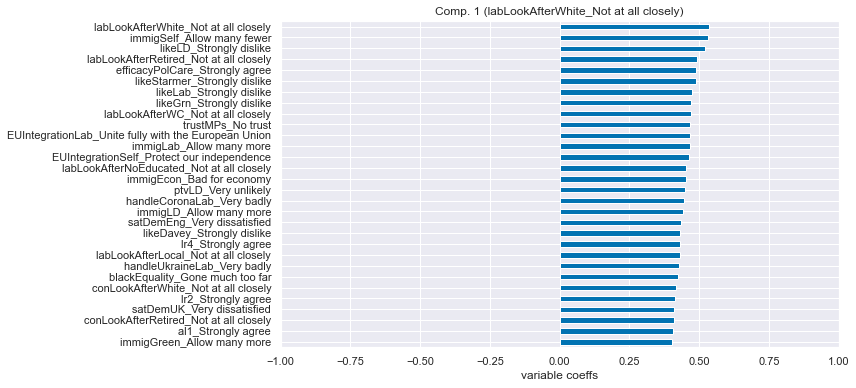

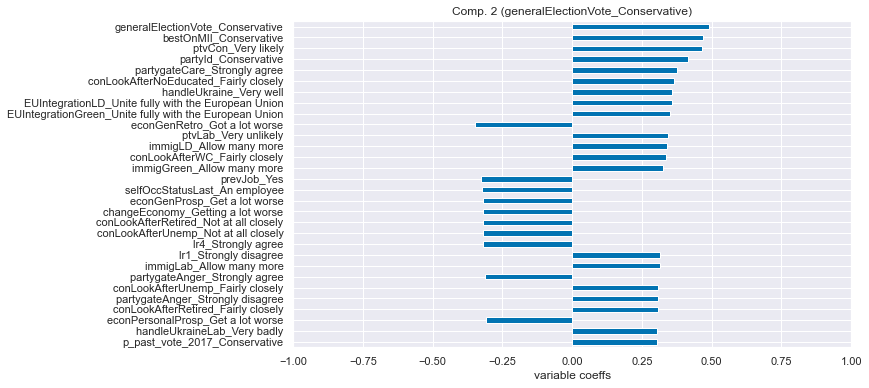

In [64]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(Conservative,"Don't know|partyContact").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.02],axis=1)

n_compFA = 3
n_comp = 3

(BES_decomp, comp_labels, comp_dict) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [ ]:
### okay - how about a FA with *just* party evaluation/voting behaviour variables?

In [79]:
# search(Conservative,"turnout")

## bit too confusing with turnout

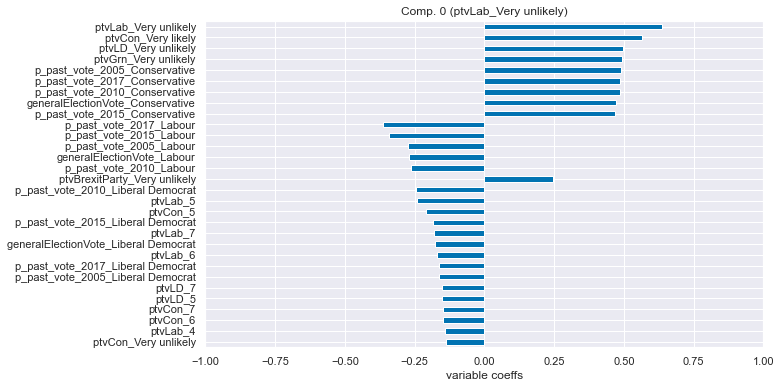

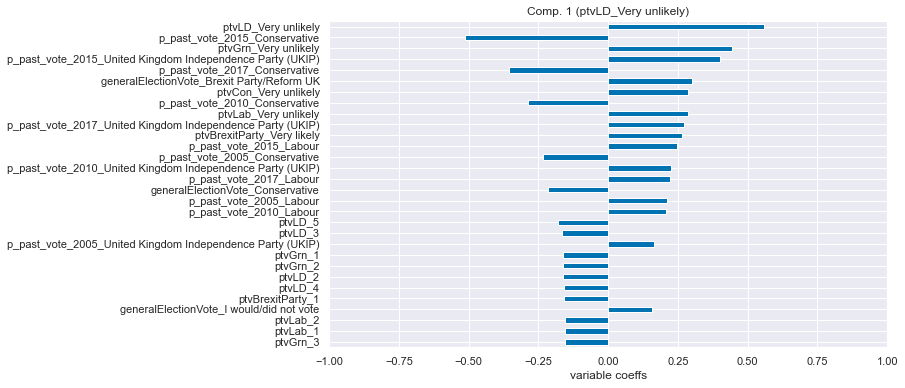

In [80]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(ConservativeSimple,"Don't know|partyContact").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.02],axis=1)
ConservativeSimple = ConservativeSimple[search(ConservativeSimple,"p_past|generalElection|ptv").index]
n_compFA = 2
n_comp = 2

(BES_decomp, comp_labels, comp_dict) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [82]:
search(Conservative,"al_scale")

al_scale_Libertarian      11552
al_scale_0.5              11552
al_scale_1.0              11552
al_scale_1.5              11552
al_scale_2.0              11552
al_scale_2.5              11552
al_scale_3.0              11552
al_scale_3.5              11552
al_scale_4.0              11552
al_scale_4.5              11552
al_scale_5.0              11552
al_scale_5.5              11552
al_scale_6.0              11552
al_scale_6.5              11552
al_scale_7.0              11552
al_scale_7.5              11552
al_scale_8.0              11552
al_scale_8.5              11552
al_scale_9.0              11552
al_scale_9.5              11552
al_scale_Authoritarian    11552
dtype: int64

In [88]:
al_scale = df.loc[Conservative.index,"al_scale"].cat.codes.replace(-1,np.nan)
lr_scale = df.loc[Conservative.index,"lr_scale"].cat.codes.replace(-1,np.nan)

In [ ]:
### uniform version?

In [100]:
ptvLab = df.loc[Conservative.index,search(df,"ptv(Lab|LD|BrexitParty|Grn)").index].replace("Don't know",np.nan).apply(lambda x: 
                                            x.cat.codes.replace(-1,np.nan))["ptvLab"]
ptvLD = df.loc[Conservative.index,search(df,"ptv(Lab|LD|BrexitParty|Grn)").index].replace("Don't know",np.nan).apply(lambda x: 
                                            x.cat.codes.replace(-1,np.nan))["ptvLD"]
ptvBrexitParty = df.loc[Conservative.index,search(df,"ptv(Lab|LD|BrexitParty|Grn)").index].replace("Don't know",np.nan).apply(lambda x: 
                                            x.cat.codes.replace(-1,np.nan))["ptvBrexitParty"]
ptvGrn = df.loc[Conservative.index,search(df,"ptv(Lab|LD|BrexitParty|Grn)").index].replace("Don't know",np.nan).apply(lambda x: 
                                            x.cat.codes.replace(-1,np.nan))["ptvGrn"]

In [139]:
ptvs = df.loc[Conservative.index,search(df,"ptv(Lab|LD|BrexitParty|Grn|Con)").index].replace("Don't know",np.nan).apply(lambda x: 
                                            x.cat.codes.replace(-1,np.nan))

In [140]:
ptvs.idxmax(axis=1).value_counts()

ptvCon            8914
ptvBrexitParty     802
ptvLab             746
ptvLD              476
ptvGrn             241
dtype: int64

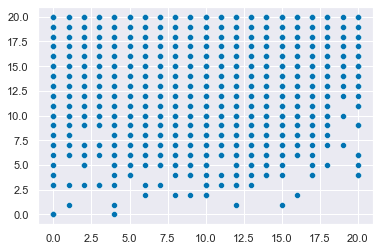

In [101]:
sns.scatterplot(lr_scale,al_scale)

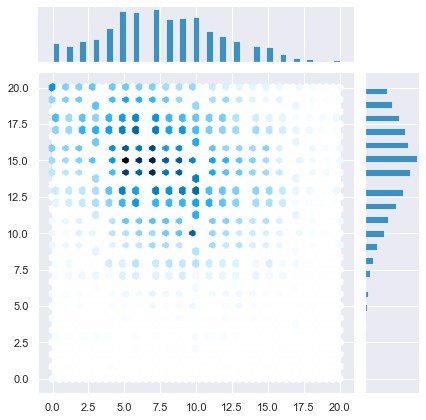

In [103]:
sns.jointplot(lr_scale,al_scale,kind='hex')

In [142]:
color = ptvs.idxmax(axis=1).replace({'ptvLab':'r', 'ptvLD':'o',
                                                                   'ptvBrexitParty':'m', 'ptvGrn':'g','ptvCon':'b'}).fillna('k')

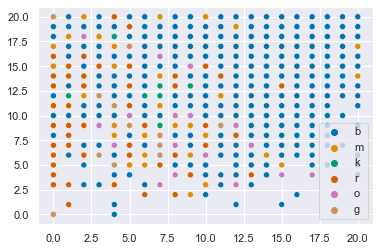

In [143]:
sns.scatterplot(lr_scale,al_scale,hue=color )

In [130]:
# sns.jointplot(lr_scale,al_scale,kind='hex',hue=color)

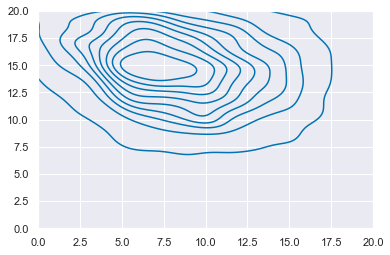

In [149]:
sns.kdeplot(lr_scale[color=='b'],al_scale[color=='b'],c='b',cut=0 )
plt.xlim([0,20]);
plt.ylim([0,20]);

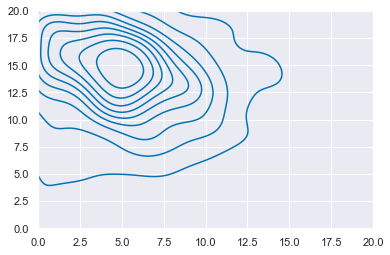

In [150]:
sns.kdeplot(lr_scale[color=='r'],al_scale[color=='r'],c='r',cut=0 )
plt.xlim([0,20]);
plt.ylim([0,20]);

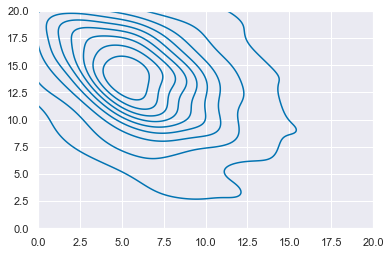

In [151]:
sns.kdeplot(lr_scale[color=='o'],al_scale[color=='o'],c='o',cut=0 )
plt.xlim([0,20]);
plt.ylim([0,20]);

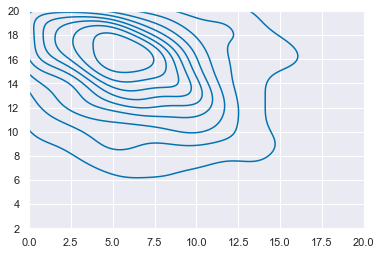

In [147]:
sns.kdeplot(lr_scale[color=='m'],al_scale[color=='m'],c='m',cut=0 )
plt.xlim([0,20]);
plt.ylim([0,20]);

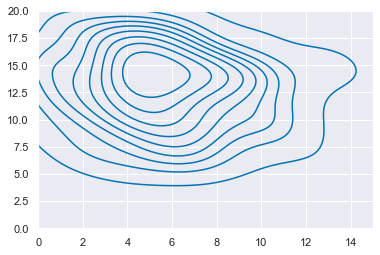

In [148]:
sns.kdeplot(lr_scale[color=='g'],al_scale[color=='g'],c='g',cut=0 )
plt.xlim([0,20]);
plt.ylim([0,20]);

In [ ]:
### two options

# Political dominance map!
# LDA using Maxptv to get better separating variables
# quick scout for correlations?

In [169]:
df[df["p_past_vote_2019"]=="Conservative"]["generalElectionVote"].value_counts()

Conservative                     6767
Don't know                       2355
Labour                            640
Brexit Party/Reform UK            577
Liberal Democrat                  409
I would/did not vote              339
Other                             196
Green Party                       135
Scottish National Party (SNP)      20
Plaid Cymru                        13
Name: generalElectionVote, dtype: int64

In [153]:
search(Conservative,"generalElection")

generalElectionVote_I would/did not vote             11552
generalElectionVote_Conservative                     11552
generalElectionVote_Labour                           11552
generalElectionVote_Liberal Democrat                 11552
generalElectionVote_Scottish National Party (SNP)    11552
generalElectionVote_Plaid Cymru                      11552
generalElectionVote_Green Party                      11552
generalElectionVote_Other                            11552
generalElectionVote_Brexit Party/Reform UK           11552
generalElectionVote_Don't know                       11552
dtype: int64

In [172]:
Conservative.corrwith(Conservative["generalElectionVote_Don't know"]).sort_values().head(50)

generalElectionVote_Conservative                 -0.601769
ptvCon_Very likely                               -0.335691
bestOnMII_Conservative                           -0.332492
turnoutUKGeneral_Very likely that I would vote   -0.270506
ptvLab_Very unlikely                             -0.221326
partyId_Conservative                             -0.214977
partyIdStrength_Fairly strong                    -0.208030
handleUkraine_Very well                          -0.180968
partygateCare_Strongly agree                     -0.170452
likeCon_Strongly like                            -0.162259
ptvLD_Very unlikely                              -0.161390
handleCorona_Very well                           -0.157784
ptvGrn_Very unlikely                             -0.156721
conLookAfterNoEducated_Fairly closely            -0.156350
likeCon_8                                        -0.153012
conLookAfterLocal_Fairly closely                 -0.152912
conLookAfterWC_Fairly closely                    -0.1487

In [ ]:
# CON -> DK VI

# generally DK
# partyId_No - none, partyIdSqueeze_No - none, bestOnMII_No party is best able to handle this issue
# gender!

In [ ]:
# CON -> WNV VI

# turnoutUKGeneral, partyIdSqueeze_No - none, partyId_No - none , efficacyNoMatter_Strongly agree
# p_turnout_2017_No, I did not vote, euRefVote_I would/will not vote, efficacyPolCare_Strongly agree
# bestOnMII_No party is best able to handle this issue, likeJohnson_Strongly dislike,
# polAttention_Pay no attention

In [ ]:
# CON -> LAB VI

# bestOnMII_<Party>,partyId,like<Party>,ptv<Party>
# localElectionVote_Labour, likeJohnson_Strongly dislike,likeStarmer_7
# lr4(/1/3/2)_Strongly agree   (one law for rich/redist options >> class war)

In [ ]:
# CON -> GP VI

# bestOnMII_<Party>,partyId,like<Party>,ptv<Party>
# localElectionVote_Green Party


In [ ]:
# CON -> LD VI

# bestOnMII_<Party>,partyId,like<Party>,ptv<Party>,like<PartyLeader>,p_past_vote_<year>_<Party>
# partygateAnger, partygateCare_Strongly disagree, likeJohnson_Strongly dislike,
# euRefVote_Stay/remain in the EU, effectsRemainEcon_Better,


In [ ]:
# CON -> BXP VI

## bestOnMII_<party>, ptv<Party>,partyId_<Party>,like<Party>,like<PartyLeader>,partyIdSqueeze_<Party>
# <party>LookAfter<GroupsxAmount>,
# EUIntegration<Party>,blackEquality,immigSelf,trustMPs,
# p_past_vote

# anti-correlation with Brexit Party vote!
# vaccinated3_Yes, three or more doses (a booster/additional dose)   -0.153741
# p_eurefvote, gender_Female, immigEcon
# satDem

In [ ]:
#### how about try to create a "Political Behaviour Space"


# partyId, partyIdSqueeze, partyIdStrength
# ptv, like, 
# <party>LookAfter<GroupsxAmount>, bestOnMII_<party>
# p_past_vote,p_past_vote, generalElectionVote, localElectionVote,  euRefVote
# localTurnoutRetro, p_turnout, p_eurefturnout, turnoutUKGeneral,

In [38]:
search(df,"partyId|ptv|^like|LookAfter|bestOnMII|p_past_vote|p_past_vote|generalElectionVote|localElectionVote|euRefVote|localTurnoutRetro|p_turnout|p_eurefturnout|turnoutUKGeneral")
# search(df,"")

turnoutUKGeneral       30949
generalElectionVote    30400
partyIdStrength        25138
partyId                30949
partyIdSqueeze          9037
                       ...  
p_eurefvote            26616
p_turnout_2010         23034
p_turnout_2005         21790
p_turnout_scot_ref     11922
p_eurefturnout         30913
Length: 95, dtype: int64

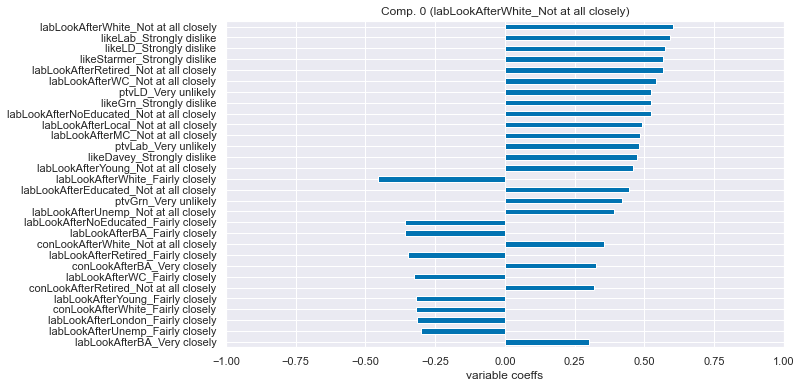

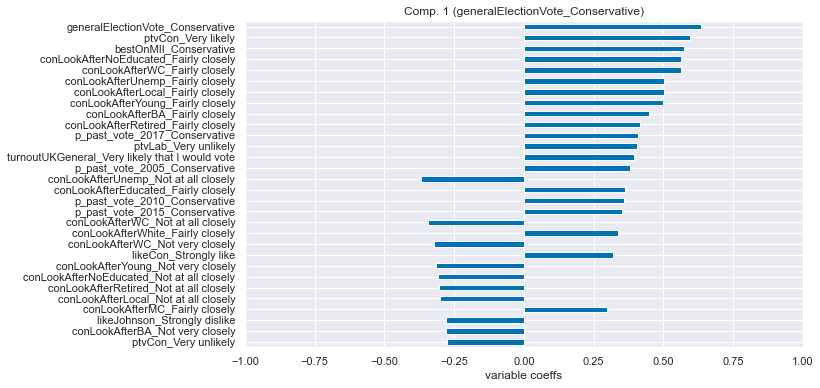

In [83]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(ConservativeSimple,"Don't know|partyContact").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.05],axis=1)
ConservativeSimple = ConservativeSimple[search(ConservativeSimple,"partyId$|partyIdStrength$|ptv|^like|LookAfter|bestOnMII|p_past_vote|p_past_vote|generalElectionVote|localElectionVote|euRefVote|localTurnoutRetro|p_turnout_20|p_eurefturnout|turnoutUKGeneral").index]
n_compFA = 2
n_comp = 2

(BES_decomp, comp_labels, comp_dict, decomp) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="Factor Analysis",show_first_x_comps=n_comp)

In [45]:
# set(["_".join(x.split("_")[0:-1]) for x in ConservativeSimple.columns])

In [87]:
pd.Series(decomp.noise_variance_, index = ConservativeSimple.columns).sort_values().head(50)

likeLab_Strongly dislike                          0.575783
generalElectionVote_Conservative                  0.595584
ptvLab_Very unlikely                              0.604156
ptvCon_Very likely                                0.614661
conLookAfterWC_Fairly closely                     0.630179
labLookAfterWhite_Not at all closely              0.638350
likeStarmer_Strongly dislike                      0.643762
likeLD_Strongly dislike                           0.646858
conLookAfterNoEducated_Fairly closely             0.648182
ptvLD_Very unlikely                               0.661013
bestOnMII_Conservative                            0.669867
labLookAfterRetired_Not at all closely            0.677802
conLookAfterLocal_Fairly closely                  0.702456
likeGrn_Strongly dislike                          0.705652
labLookAfterWC_Not at all closely                 0.707175
labLookAfterNoEducated_Not at all closely         0.723027
conLookAfterYoung_Fairly closely                  0.7278

In [80]:
pd.Series(decomp.noise_variance_).sort_values()

310    0.021632
309    0.029274
268    0.210347
265    0.286209
260    0.300934
         ...   
28     0.993766
98     0.993826
242    0.995088
241    0.995901
318    0.998706
Length: 321, dtype: float64

In [63]:
search(df,"partyId")

partyIdStrength    25138
partyId            30949
partyIdSqueeze      9037
dtype: int64

In [69]:
ConservativeSimple.columns

Index(['turnoutUKGeneral_Fairly likely',
       'turnoutUKGeneral_Very likely that I would vote',
       'generalElectionVote_Conservative',
       'bestOnMII_No party is best able to handle this issue',
       'bestOnMII_Conservative', 'localTurnoutRetro_No, did not vote',
       'localTurnoutRetro_Yes, voted', 'localElectionVote_Conservative',
       'likeJohnson_Strongly dislike', 'likeJohnson_3',
       ...
       'p_turnout_2015_No, I did not vote', 'p_turnout_2015_Yes, I voted',
       'p_turnout_2017_No, I did not vote', 'p_turnout_2017_Yes, I voted',
       'p_eurefvote_I voted to remain', 'p_eurefvote_I voted to leave',
       'p_turnout_2010_No, I did not vote', 'p_turnout_2010_Yes, I voted',
       'p_turnout_2005_No, I did not vote', 'p_turnout_2005_Yes, I voted'],
      dtype='object', length=192)

array(['WNV', 'CON', 'LAB', 'LD', 'GP', 'OTH', 'REF', 'DK'], dtype=object)

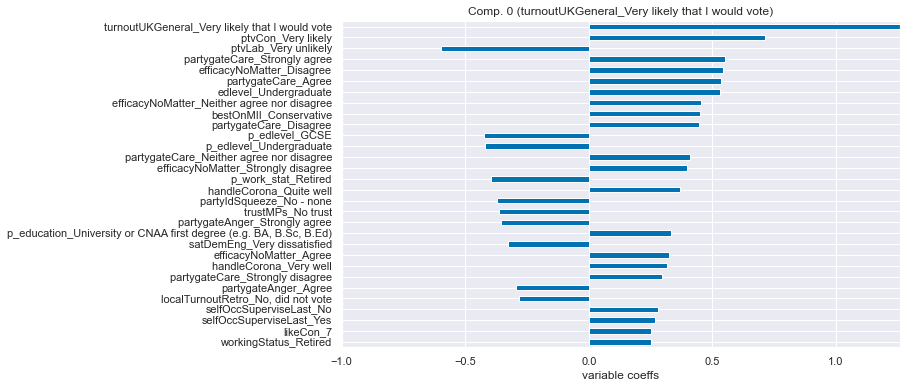

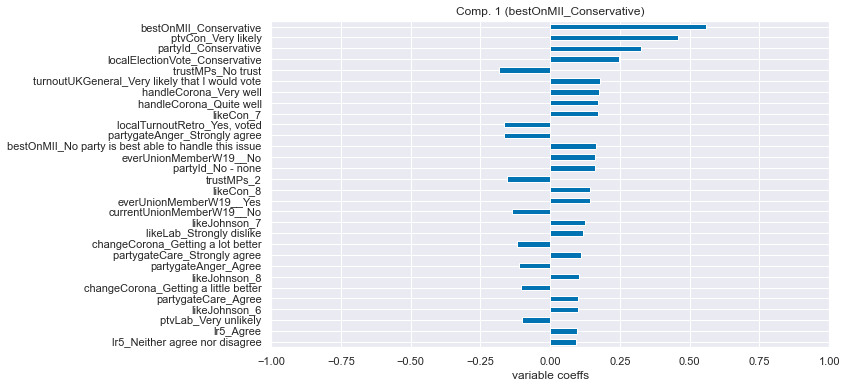

In [154]:
ConservativeSimple = Conservative[ Conservative["country_England"]==1 ]
ConservativeSimple = ConservativeSimple.drop(search(ConservativeSimple,"Don't know|partyContact").index,axis=1)
ConservativeSimple = ConservativeSimple.drop(ConservativeSimple.columns[ConservativeSimple.var()<=.1],axis=1)
ConservativeSimple = ConservativeSimple.drop(search(ConservativeSimple,"generalElectionVote|gender|p_scot").index,axis=1)
# ConservativeSimple = ConservativeSimple[search(ConservativeSimple,"partyId$|partyIdStrength$|ptv|^like|LookAfter|bestOnMII|p_past_vote|p_past_vote|generalElectionVote|localElectionVote|euRefVote|localTurnoutRetro|p_turnout_20|p_eurefturnout|turnoutUKGeneral").index]
n_compFA = 2
n_comp = 2

LDA_target_base = df.loc[ConservativeSimple.index,"generalElectionVote"].cat.remove_unused_categories()
colors = ["black", "blue", "red","orange","green","brown","purple","grey"]
# ['I would/did not vote', 'Conservative', 'Labour', 'Liberal Democrat',
#        'Green Party', 'Other',
#        'Brexit Party/Reform UK', "Don't know"]

replace_dict = {'I would/did not vote':"WNV", 'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Green Party':"GP", 'Other':"OTH",
       'Brexit Party/Reform UK':"REF", "Don't know":"DK"}
replace_dict = {'I would/did not vote':"WNV&OTH", 'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Green Party':"GP", 'Other':"WNV&OTH",
       'Brexit Party/Reform UK':"REF", "Don't know":"DK"}
colors = ["black", "blue", "red","orange","green","purple","grey"]
replace_dict = {'I would/did not vote':"WNV&OTH", 'Conservative':"CON", 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Green Party':"GP", 'Other':"WNV&OTH",
       'Brexit Party/Reform UK':"REF", "Don't know":np.nan}
colors = ["black", "blue", "red","orange","green","purple","grey"]
replace_dict = {'I would/did not vote':"WNV&OTH", 'Conservative':np.nan, 'Labour':"LAB", 'Liberal Democrat':"LD",
       'Green Party':"GP", 'Other':"WNV&OTH",
       'Brexit Party/Reform UK':"REF", "Don't know":"DK"}
colors = ["black", "blue", "red","orange","green","purple","grey"]

replace_dict = {'I would/did not vote':"WNV&OTH", 'Conservative':"CON", 'Labour':"LAB&LD&GP", 'Liberal Democrat':"LAB&LD&GP",
       'Green Party':"LAB&LD&GP", 'Other':"WNV&OTH",
       'Brexit Party/Reform UK':"REF", "Don't know":"DK"}
colors = ["black", "blue", "red","purple","grey"]
LDA_target_base = LDA_target_base.replace(replace_dict).astype('category').cat.reorder_categories(pd.Series(replace_dict.values()).dropna().unique())

LDA_target = LDA_target_base.cat.codes.replace(-1,np.nan)

ConservativeSimple = ConservativeSimple[LDA_target.notnull()]
LDA_target = LDA_target[LDA_target.notnull()]

(BES_decomp, comp_labels, comp_dict, decomp) = dim_red(ConservativeSimple, n_components=n_compFA,
                                               red_type="LDA",show_first_x_comps=n_comp,LDA_target=LDA_target)

Text(0.5, 1.0, 'LDA of CON2019 vote by VI (May 2022)')

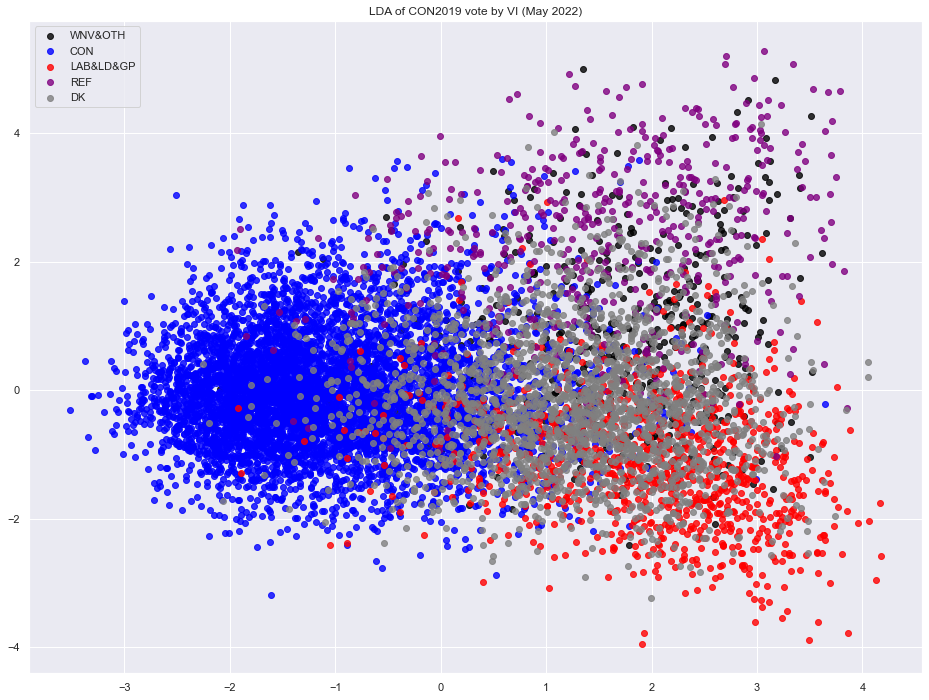

In [155]:
target_names = LDA_target_base.cat.categories

lw = 2

plt.figure(figsize=(16,12))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7], target_names):
    plt.scatter(
        BES_decomp.loc[LDA_target == i, 0], BES_decomp.loc[LDA_target == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of CON2019 vote by VI (May 2022)")

In [128]:
df.loc[ConservativeSimple.index,"generalElectionVote"].cat.categories

Index(['I would/did not vote', 'Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru', 'Green Party', 'Other',
       'Brexit Party/Reform UK', 'Don't know'],
      dtype='object')

In [122]:
decomp.intercept_

array([-12.65232051,  -1.25565575, -10.87736794,  -9.6745258 ,
       -12.11029715,  -9.31509381,  -9.33759764,  -3.06075782])

In [99]:
df.loc[ConservativeSimple.index,"generalElectionVote"].value_counts()

Conservative                     5852
Don't know                       2076
Labour                            526
Brexit Party/Reform UK            518
Liberal Democrat                  361
I would/did not vote              311
Other                             169
Green Party                       125
Scottish National Party (SNP)       0
Plaid Cymru                         0
Name: generalElectionVote, dtype: int64

0                    Don't know
3                  Conservative
4                  Conservative
5        Brexit Party/Reform UK
11                   Don't know
                  ...          
30884              Conservative
30919    Brexit Party/Reform UK
30930                Don't know
30932              Conservative
30942                Don't know
Name: generalElectionVote, Length: 10023, dtype: category
Categories (8, object): ['I would/did not vote' < 'Conservative' < 'Labour' < 'Liberal Democrat' < 'Green Party' < 'Other' < 'Brexit Party/Reform UK' < 'Don't know']

In [197]:
BES_Panel = df

global num_to_weight
def get_weights(dataset_name, BES_Panel):
    max_wave = int(re.match("W(\d+)_",dataset_name).groups()[0])
    num_to_wave = {x:"W"+str(x) for x in range(1,max_wave+1)}
    ## problem here if it's *not* a combined panel!
    num_to_weight = { y:[x for x in BES_Panel.columns.sort_values(ascending=False) if re.match("wt_(new|full)_W"+str(y)+"$",x)][0] for y in range(1,max_wave+1) }
    weights = BES_Panel[list(num_to_weight.values())].copy()
    return max_wave, num_to_wave, num_to_weight, weights

def nice_bar_plot(ser1, ser2, output_folder, BES_Panel, normalize = 'columns', sort_labels=False,
                  text_width=8, text_fontsize=14, min_sample_size=100, title=None, drop_insig=True, fuckErrors=True,
                  mask=1, title_fontsize=14):
    var1 = ser1.name
    var2 = ser2.name
    
    mask = ser1.notnull() & ser2.notnull() & mask
    ct = pd.crosstab( ser1, ser2,
                      values= get_all_weights(mask, BES_Panel), aggfunc=sum, normalize=normalize)*100
    if sort_labels:
        sorted_labels = list(ser2.value_counts().index)
    else:
        sorted_labels = list(ser2.cat.categories)
           

    unweighted = pd.crosstab( ser1, ser2 )
    errors = 100 * np.sqrt(unweighted)/unweighted     

    labels_by_sample_size = {unweighted.sum().values[x]:sorted_labels[x]+" (N="+str(unweighted.sum().values[x])+")" for x in range(0,len(sorted_labels))}    
    labels_by_sample_size = {sorted_labels[x]+" (N="+str(unweighted.sum().values[x])+")":unweighted.sum().values[x] for x in range(0,len(sorted_labels))}    
    labels_restricted = [x for x in labels_by_sample_size.keys() if labels_by_sample_size[x] > min_sample_size] 
#     return labels_by_sample_size, labels_restricted
    if drop_insig:
        rubbish_entries = ct<errors
        ct[rubbish_entries]=np.nan
        errors[rubbish_entries]=np.nan
#     return(sorted_labels, errors, labels_by_sample_size)
    all_nan_rows = ~errors.isnull().any(axis=1)
    errors.columns = list( labels_by_sample_size.keys() )
   
    ct.columns = list( labels_by_sample_size.keys() )
    ct = ct.loc[all_nan_rows, labels_restricted]
#     return errors, labels_restricted
    errors = errors.loc[all_nan_rows, labels_restricted]
#     errors=errors.T
#     return errors
#     return errors, ct
    treatment = var2 +" by " + var1
    output_subfolder = create_subdir(output_folder, treatment)
    
    import textwrap 

    wrapper = textwrap.TextWrapper(width=text_width) 

    stacked = ct.stack().reset_index().rename(columns={0:'%',"level_1":var2})
    err_stacked = errors.stack().reset_index().rename(columns={0:'%',"level_1":var2})
    fig = plt.figure(figsize=(20, 8))
    ax = fig.subplots()

#     a = [np.ones(16),np.ones(16)]
#     a = errors.values
#     return a
#     iter(a)    
    
    stacked[var1] = stacked[var1].apply( lambda x: x +" (N="+str(unweighted.sum(axis=1).loc[x])+")" )
    stacked[var1].cat.set_categories(stacked[var1].cat.categories[all_nan_rows],inplace=True)
#     return stacked
#     return stacked['%'].shape,err_stacked["%"].values.reshape(len(stacked),1).shape
    if fuckErrors:
        sns.barplot(x = stacked[var2],
                    y = stacked['%'],
                    hue = stacked[var1],
                    ax = ax, order = labels_restricted);
    else:
        sns.barplot(x = stacked[var2],
                    y = stacked['%'],
                    hue = stacked[var1],
                    yerr = errors.values)        
#                    ax = ax, order = labels_restricted,
                    # err_stacked["%"].values );
# .reshape(len(stacked),1)
    if title is None:
        title = var2 +" by " + var1
    plt.title(title, fontsize=title_fontsize)
    sorted_labels = [sorted_labels[x]+" (N="+str(unweighted.sum().values[x])+")" for x in range(0,len(sorted_labels))]
    ax.set_xticklabels([ wrapper.fill(text=x) for x in labels_restricted], rotation=0, fontsize=text_fontsize);

    ax.annotate(dataset_citation, (0,0), (0, -140),
                     xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ;           
    fname = output_subfolder + clean_filename(title) + ".png"
    fig.savefig( fname, bbox_inches='tight' )    

In [176]:
search(df,"lookAfter")

# BA=Black and Asian, White, MC, WC, Unemp, Local, Young, Retired, Educated, NoEducated
# Men/Women reduced sample

# con/lab/ld/grn/brx/snp

conLookAfterBA            30949
conLookAfterWhite         30949
conLookAfterMC            30949
conLookAfterWC            30949
conLookAfterUnemp         30949
conLookAfterLocal         30949
conLookAfterLondon        30949
conLookAfterYoung         30949
conLookAfterRetired       30949
conLookAfterEducated      30949
conLookAfterNoEducated    30949
conLookAfterWomen          7878
conLookAfterMen            7878
labLookAfterBA            30949
labLookAfterWhite         30949
labLookAfterMC            30949
labLookAfterWC            30949
labLookAfterUnemp         30949
labLookAfterLocal         30949
labLookAfterLondon        30949
labLookAfterYoung         30949
labLookAfterRetired       30949
labLookAfterEducated      30949
labLookAfterNoEducated    30949
labLookAfterWomen          7878
labLookAfterMen            7878
snpLookAfterLocal           806
snpLookAfterYoung           806
snpLookAfterRetired         806
snpLookAfterEducated        806
snpLookAfterNoEducated      806
grnLookA

In [178]:
search(df,"generalElectionVote")

generalElectionVote    30400
dtype: int64

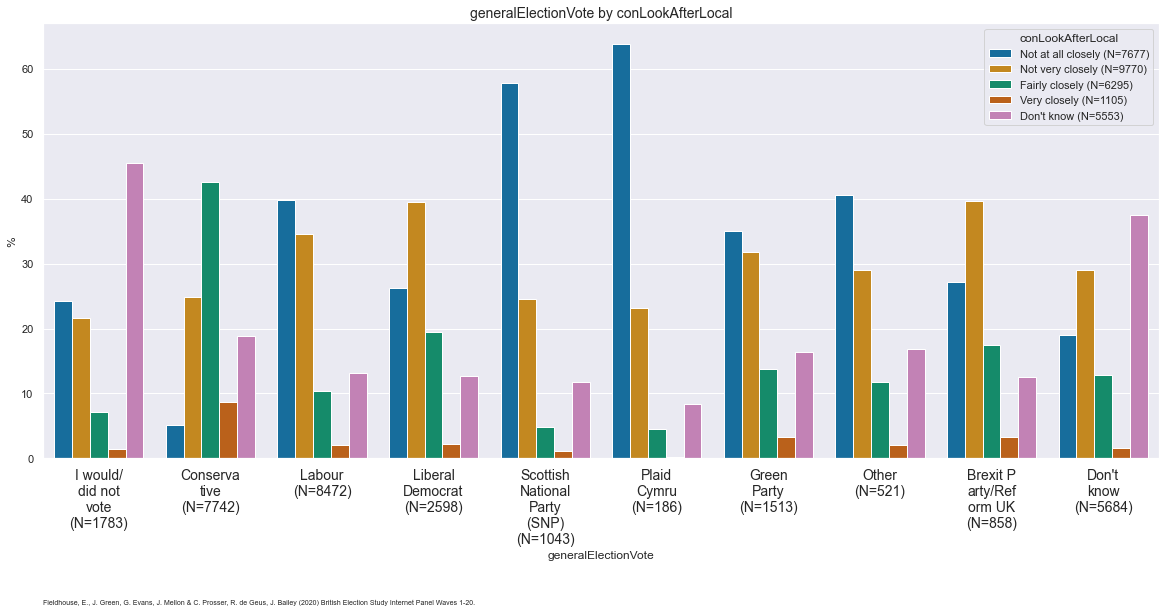

In [200]:
output_folder = "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_output"
ser1 = df["conLookAfterLocal"]
ser2 = df["generalElectionVote"]

nice_bar_plot(ser1, ser2, output_folder, df, normalize = 'columns', sort_labels=False,
                  text_width=8, text_fontsize=14, min_sample_size=100, title=None, drop_insig=False, fuckErrors=True,
                  mask=1, title_fontsize=14)

In [ ]:
# BA=Black and Asian, White, MC, WC, Unemp, Local, Young, Retired, Educated, NoEducated
# Men/Women reduced sample

# con/lab/ld/grn/brx/snp

In [3]:
temp = df[search(df,"lookAfter").index].reset_index().melt(id_vars='index')
temp["party"] = temp["variable"].apply(lambda x: x.split("Look")[0])
temp["group"] = temp["variable"].apply(lambda x: x.split("After")[1])
replace_dict = {'Not at all closely':0, 'Not very closely':1, 'Fairly closely':2,
       'Very closely':3, "Don't know":np.nan}
temp["value_num"] = temp["value"].replace(replace_dict)
temp["wt"] = df["wt"].loc[temp["index"].values].values
temp["sample_size"] = temp.groupby(["party","group"])["value_num"].apply(lambda x: x.dropna().count())

In [8]:
temp["dk%"] = temp.groupby(["party","group"])["value"].apply(lambda x: (x=="Don't know").mean()).loc[ [(x[0],x[1]) for x in temp[["party","group"]].values] ].values

In [11]:
temp.groupby(["party","group"])["value"].apply(lambda x: (x=="Don't know").mean())

party  group     
brx    Educated      0.179941
       Local         0.171443
       London        0.177227
       NoEducated    0.179747
       Retired       0.174836
       Young         0.176419
con    BA            0.241688
       Educated      0.226986
       Local         0.188019
       London        0.193189
       MC            0.152703
       Men           0.054509
       NoEducated    0.226663
       Retired       0.157065
       Unemp         0.157485
       WC            0.148438
       White         0.181040
       Women         0.054057
       Young         0.202365
grn    Educated      0.150926
       Local         0.139746
       London        0.149633
       NoEducated    0.153414
       Retired       0.144787
       Young         0.138001
lab    BA            0.275647
       Educated      0.315293
       Local         0.282206
       London        0.302788
       MC            0.231995
       Men           0.074413
       NoEducated    0.310317
       Retired       0

In [12]:
temp["value"].value_counts()

Don't know            247894
Fairly closely        243837
Not very closely      167908
Not at all closely    103868
Very closely           93367
Name: value, dtype: int64

In [13]:
temp["value_num"].value_counts()

2.0    243837
1.0    167908
0.0    103868
3.0     93367
Name: value_num, dtype: int64

In [ ]:
temp["sample_size"] = temp.groupby(["party","group"])["value_num"].apply(lambda x: x.dropna().count()).loc[ [(x[0],x[1]) for x in temp[["party","group"]].values] ].values

In [15]:
temp

index                variable             value party       group  \
0            0          conLookAfterBA    Fairly closely   con          BA   
1            1          conLookAfterBA        Don't know   con          BA   
2            2          conLookAfterBA  Not very closely   con          BA   
3            3          conLookAfterBA  Not very closely   con          BA   
4            4          conLookAfterBA    Fairly closely   con          BA   
...        ...                     ...               ...   ...         ...   
1516496  30944  brxLookAfterNoEducated        Don't know   brx  NoEducated   
1516497  30945  brxLookAfterNoEducated               NaN   brx  NoEducated   
1516498  30946  brxLookAfterNoEducated               NaN   brx  NoEducated   
1516499  30947  brxLookAfterNoEducated               NaN   brx  NoEducated   
1516500  30948  brxLookAfterNoEducated        Don't know   brx  NoEducated   

         value_num        wt  sample_size       dk%  
0              2.0  0.547746        23469  0.241688  
1              NaN  0.571612        23469  0.241688  
2              1.0  0.406625        23469  0.241688  
3              1.0  0.912995        23469  0.241688  
4              2.0  0.580910        23469  0.241688  
...            ...       ...          ...       ...  
1516496        NaN  0.465997         2240  0.179747  
1516497        NaN  3.207675         2240  0.179747  
1516498        NaN  1.641358         2240  0.179747  
1516499        NaN  1.058578         2240  0.179747  
1516500        NaN  1.630763         2240  0.179747  

[1516501 rows x 9 columns]

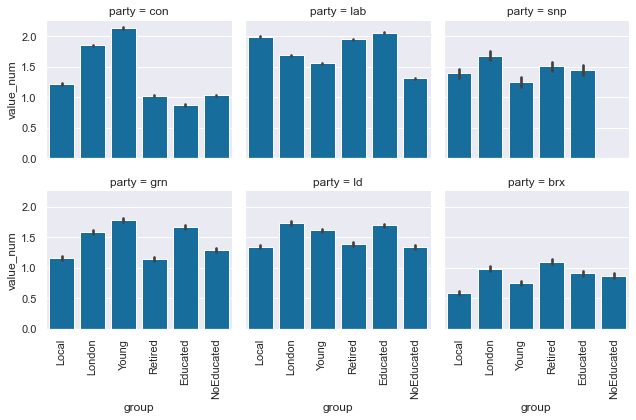

In [20]:
g = sns.FacetGrid(temp, col="party", col_wrap = 3)
g.map(sns.barplot, "group", "value_num")

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(temp, col="party", row="group")
g.map(sns.countplot, "value")

In [ ]:
##########################################################################################